# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
There was a 45 day study on 249 mice that we tract what type of drug was taken and the tumor size the mouse had.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata,  on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
merged_data["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mice['Mouse ID'].unique())]
all_duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Identify duplicate Mouse IDs
duplicate_mouse_ids = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

# Use the first duplicate Mouse ID as the one to drop
mouse_id_to_drop = duplicate_mouse_ids[0]

# Create a clean DataFrame by dropping all occurrences of the specified Mouse ID
cleaned_data = merged_data[merged_data['Mouse ID'] != mouse_id_to_drop]

# Display the clean DataFrame for preview
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_data["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#merged_data.describe()

drug = cleaned_data.groupby(["Drug Regimen"])
mean = drug["Tumor Volume (mm3)"].mean()
median  = drug["Tumor Volume (mm3)"].median()
var =  drug["Tumor Volume (mm3)"].var()
std = drug["Tumor Volume (mm3)"].std()
sem  = drug["Tumor Volume (mm3)"].sem()
summary = pd.DataFrame({ "Mean Tumor Volume": mean, 
                                    "Median Tumor Volume": median, 
                                    "Variance Tumor Volume": var, 
                                    "Standard Deviation Tumor Volume": std,
                                     "SEM Tumor Volume": sem
    
    
})

summary
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

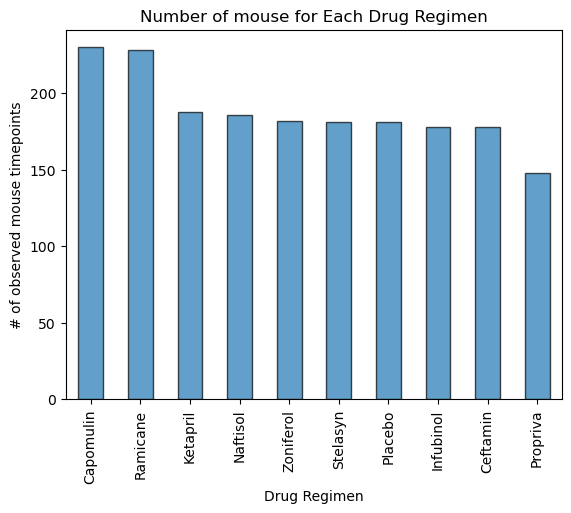

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows for each drug regimen
drug_counts = cleaned_data['Drug Regimen'].value_counts()

# Create a bar plot using pandas
drug_counts.plot(kind='bar', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed mouse timepoints')
plt.title('Number of mouse for Each Drug Regimen')

# Display the plot
plt.show()

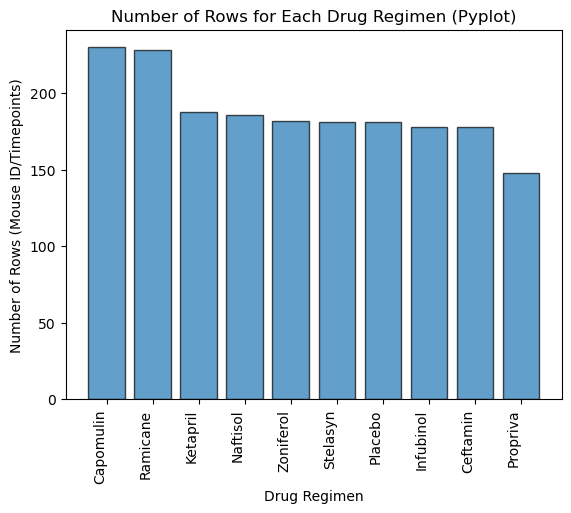

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_counts.index, drug_counts, alpha=0.7, edgecolor='black')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.title('Number of Rows for Each Drug Regimen (Pyplot)')
plt.xticks(rotation=90, ha='right')
plt.show()

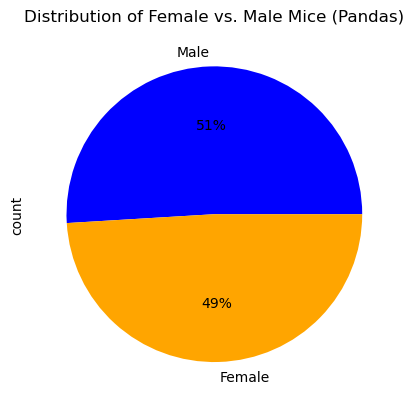

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = cleaned_data['Sex'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.0f%%', colors=['blue', 'orange'])
plt.title('Distribution of Female vs. Male Mice (Pandas)')
plt.show()

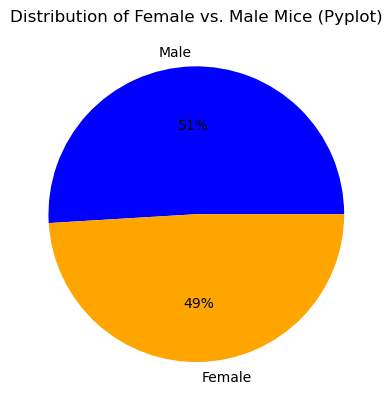

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.0f%%', colors=['blue', 'orange'])

plt.title('Distribution of Female vs. Male Mice (Pyplot)')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

selected_regimens_data = cleaned_data[cleaned_data['Drug Regimen'].isin(treatments)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = selected_regimens_data.groupby('Mouse ID')['Timepoint'].max()
last_timepoints_df = pd.DataFrame(last_timepoints)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints_df, cleaned_data, on=['Mouse ID', 'Timepoint'], how='inner')

final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #loc for each time drug is counted and tumor volumes that correlate
    tumorvolume = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumorvolume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorvolume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"For {treatment} values below {lower_bound} and above {upper_bound} are outliers.")

For Capomulin values below 20.70456164999999 and above 51.83201549 are outliers.
For Ramicane values below 17.912664470000003 and above 54.30681135 are outliers.
For Infubinol values below 36.83290494999999 and above 82.74144559000001 are outliers.
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 are outliers.


([<matplotlib.axis.XTick at 0x2b30c649b50>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

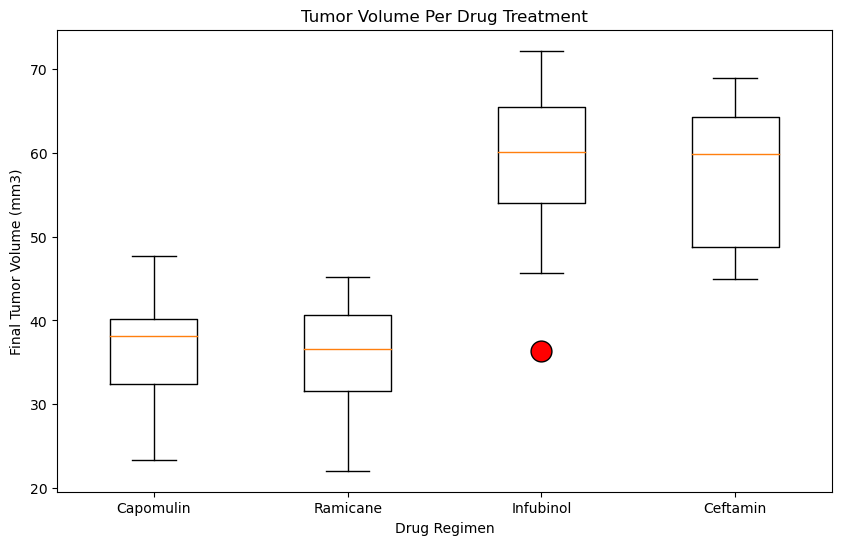

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,ax1 = plt.subplots(figsize=(10,6))
#custom marker
flierprops = dict(marker='o', markerfacecolor='red', markersize=15,
                  linestyle='none', markeredgecolor='black')
ax1.boxplot(tumor_vol_data, flierprops=flierprops)
#set labels 
ax1.set_title('Tumor Volume Per Drug Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
#label ticks
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

## Line and Scatter Plots

['b128' 'j246' 'r554' 's185' 'b742' 'x401' 'l509' 's710' 'r157' 'u364'
 'j119' 'v923' 'w914' 'i738' 'r944' 'y793' 'g316' 'g288' 'l897' 'w150'
 't565' 'i557' 'm957' 'f966' 'm601']


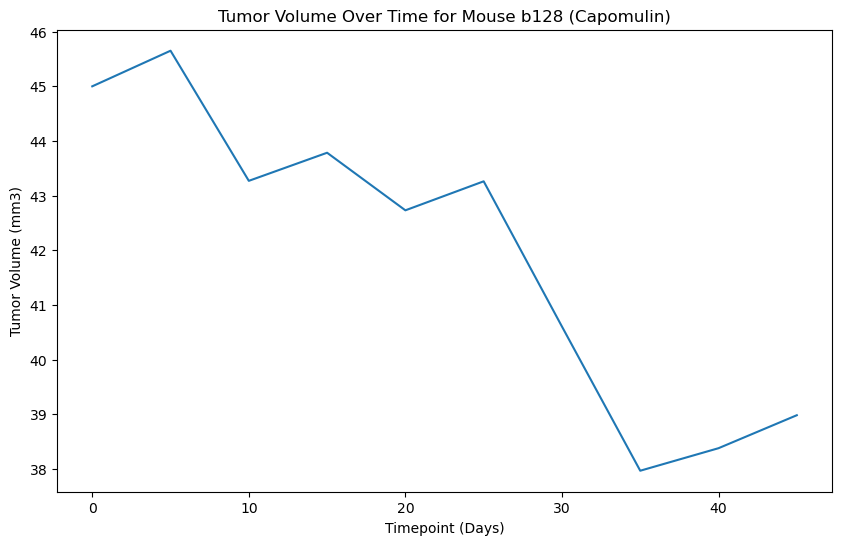

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

cap_treatment = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]

# Check the available Mouse IDs for Capomulin treatment
print(cap_treatment["Mouse ID"].unique())

# Select a valid Mouse ID from the available ones
mouse_id = "b128"

# Filter data for the selected mouse ID
mouse_data = cap_treatment.loc[cap_treatment["Mouse ID"] == mouse_id]

# Plot tumor volume vs. time point
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])

# Set labels and title
ax.set_xlabel("Timepoint (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title(f"Tumor Volume Over Time for Mouse {mouse_id} (Capomulin)")

# Show the plot
plt.show()

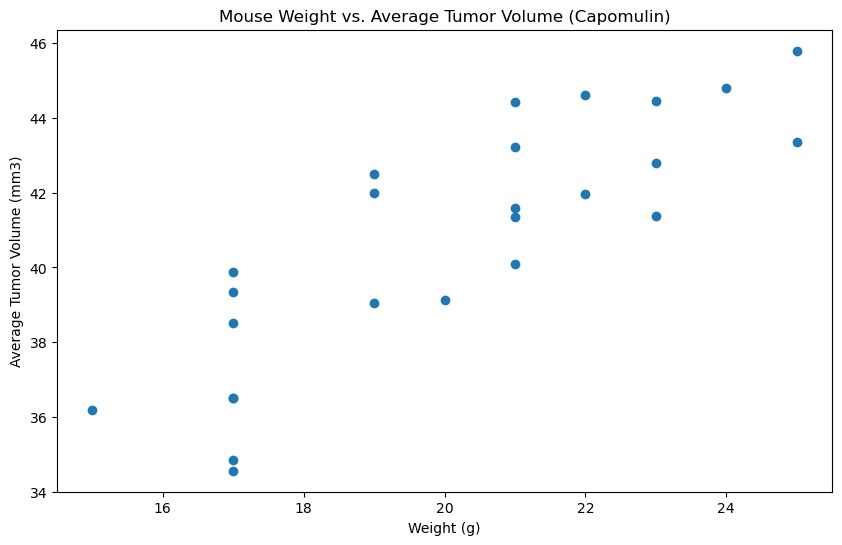

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for Capomulin treatment
cap_treatment = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse in the Capomulin regimen
avg_tumor_volume = cap_treatment.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge average tumor volume with the mouse metadata to get mouse weight
merged_data_capomulin = pd.merge(avg_tumor_volume, mouse_metadata, on="Mouse ID")

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(merged_data_capomulin["Weight (g)"], merged_data_capomulin["Tumor Volume (mm3)"], marker='o')

# Set labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")

plt.show()
 



## Correlation and Regression

Correlation Coefficient: 0.8419363424694721


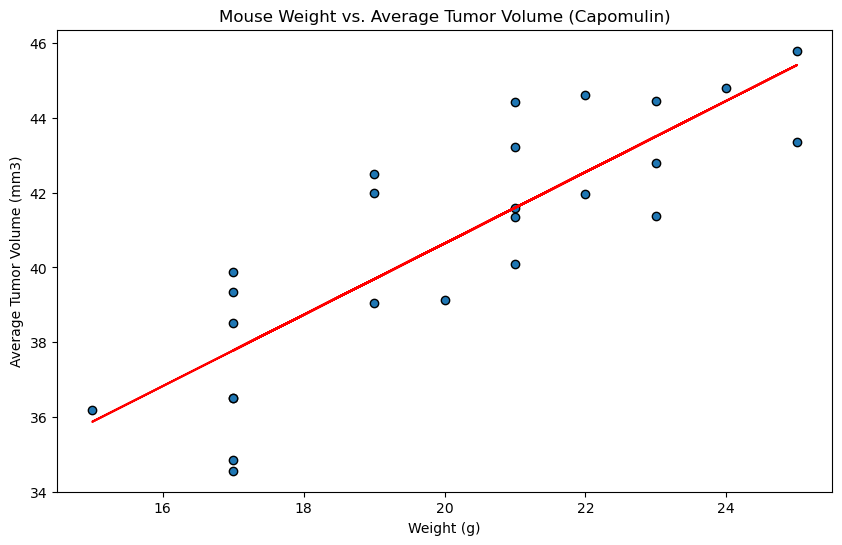

In [18]:

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data_capomulin["Weight (g)"], merged_data_capomulin["Tumor Volume (mm3)"])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data_capomulin["Weight (g)"], merged_data_capomulin["Tumor Volume (mm3)"], marker='o', edgecolors='black')

# Plot the linear regression line
regress_values = merged_data_capomulin["Weight (g)"] * slope + intercept
plt.plot(merged_data_capomulin["Weight (g)"], regress_values, color='red')

# Set labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")

# Print the correlation coefficient
print(f"Correlation Coefficient: {r_value}")

# Show the plot
plt.show()